## Section 1: Import Required Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [8]:
# Load IMDB dataset
movies_df = pd.read_csv(r'D:\PROJECTS\moive\imdb_movie_data_2023.csv', index_col=0)

print(f"🎬 Dataset Loaded Successfully!")
print(f"Total Movies: {len(movies_df)}")
print(f"\nDataset Shape: {movies_df.shape}")
print(f"\nColumns: {list(movies_df.columns)}")
print(f"\nFirst few rows:")
print(movies_df.head())

🎬 Dataset Loaded Successfully!
Total Movies: 1950

Dataset Shape: (1950, 10)

Columns: ['Moive Name', 'Rating', 'Votes', 'Meta Score', 'Genre', 'PG Rating', 'Year', 'Duration', 'Cast', 'Director']

First few rows:
                    Moive Name  Rating     Votes  Meta Score  \
0       Leave the World Behind     6.5   90000.0        67.0   
1                        Wonka     7.4   24000.0        66.0   
2                  Poor Things     8.5    6700.0        86.0   
3   Killers of the Flower Moon     7.8  128000.0        89.0   
4                 May December     7.0   21000.0        85.0   

                       Genre PG Rating  Year Duration  \
0   Drama, Mystery, Thriller         R  2023   2h 18m   
1  Adventure, Comedy, Family        PG  2023   1h 56m   
2     Comedy, Drama, Romance         R  2023   2h 21m   
3      Crime, Drama, History         R  2023   3h 26m   
4              Comedy, Drama         R  2023   1h 57m   

                                                Cast      

## Section 2: Exploratory Data Analysis

In [9]:
# Basic info about the dataset
print("📊 Dataset Info:")
print(movies_df.info())
print("\n❌ Missing Values:")
print(movies_df.isnull().sum())
print("\n📋 Sample Data:")
print(movies_df[['Moive Name', 'Rating', 'Votes', 'Genre']].head(10))

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1950 entries, 0 to 1949
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Moive Name  1950 non-null   object 
 1   Rating      1944 non-null   float64
 2   Votes       1944 non-null   float64
 3   Meta Score  1833 non-null   float64
 4   Genre       1833 non-null   object 
 5   PG Rating   1874 non-null   object 
 6   Year        1950 non-null   int64  
 7   Duration    1948 non-null   object 
 8   Cast        1833 non-null   object 
 9   Director    1833 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 167.6+ KB
None

❌ Missing Values:
Moive Name      0
Rating          6
Votes           6
Meta Score    117
Genre         117
PG Rating      76
Year            0
Duration        2
Cast          117
Director      117
dtype: int64

📋 Sample Data:
                                          Moive Name  Rating     Votes  \
0                  

⭐ Rating Statistics:
count    1944.000000
mean        6.872788
std         0.929200
min         2.400000
25%         6.300000
50%         7.000000
75%         7.500000
max         9.300000
Name: Rating, dtype: float64

📊 Votes Statistics:
count    1.944000e+03
mean     2.702837e+05
std      3.142171e+05
min      1.900000e+01
25%      6.500000e+04
50%      1.790000e+05
75%      3.550000e+05
max      2.800000e+06
Name: Votes, dtype: float64


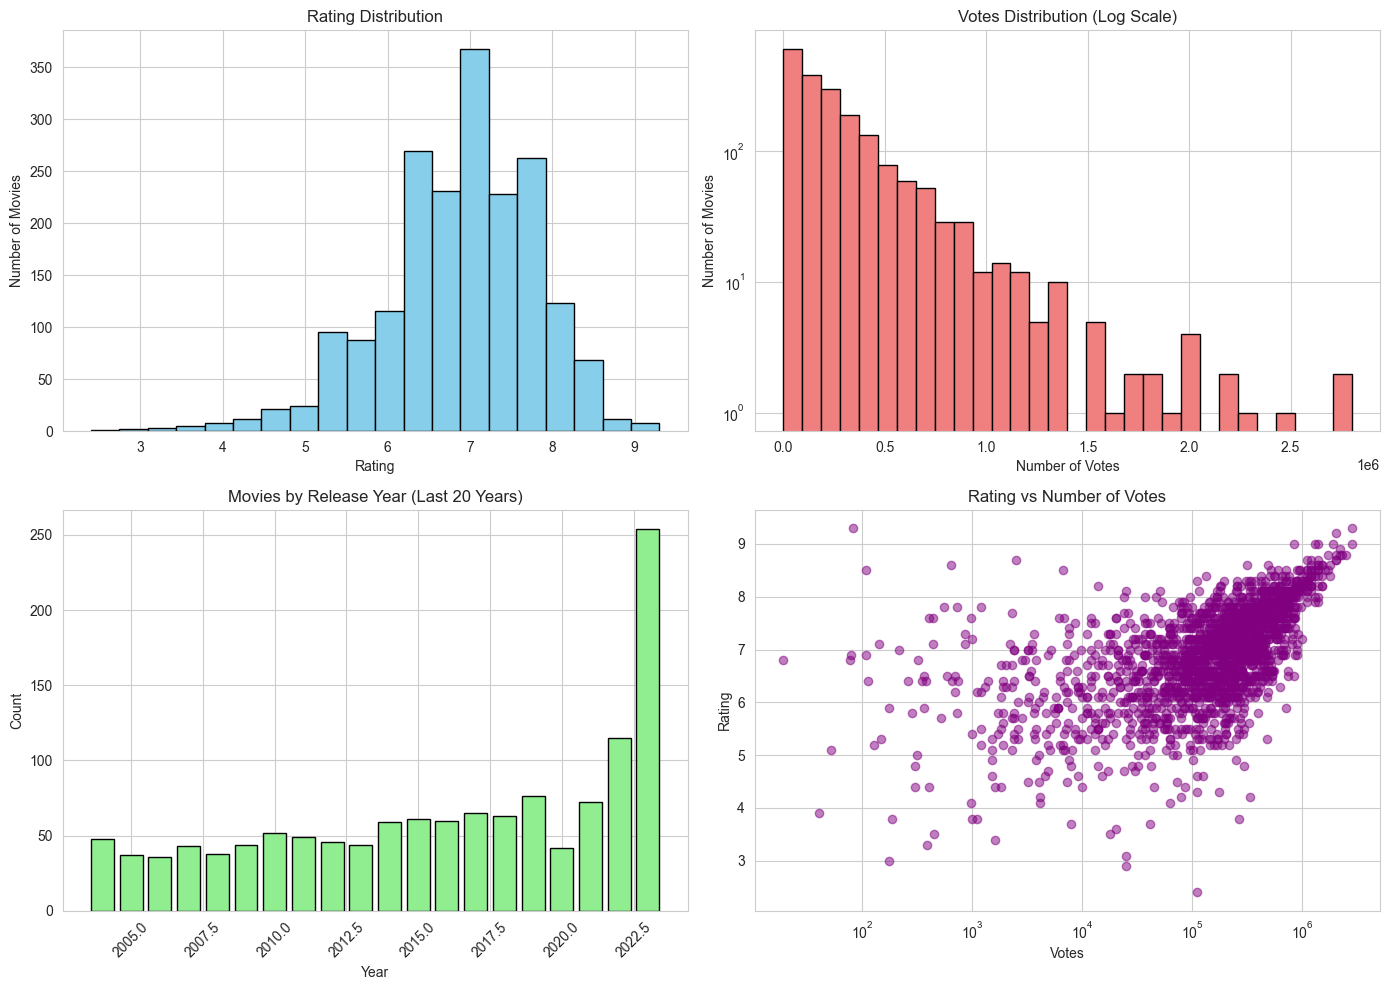


📈 Additional Stats:
Average Rating: 6.87
Average Votes: 270284
Year Range: 1938 - 2023


In [10]:
# Rating and votes statistics
print("⭐ Rating Statistics:")
print(movies_df['Rating'].describe())

print("\n📊 Votes Statistics:")
print(movies_df['Votes'].describe())

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Rating distribution
axes[0, 0].hist(movies_df['Rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Number of Movies')

# Votes distribution
axes[0, 1].hist(movies_df['Votes'].dropna(), bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Votes Distribution (Log Scale)')
axes[0, 1].set_xlabel('Number of Votes')
axes[0, 1].set_ylabel('Number of Movies')
axes[0, 1].set_yscale('log')

# Movies by year
year_counts = movies_df['Year'].value_counts().sort_index().tail(20)
axes[1, 0].bar(year_counts.index, year_counts.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Movies by Release Year (Last 20 Years)')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Rating vs Votes scatter
axes[1, 1].scatter(movies_df['Votes'], movies_df['Rating'], alpha=0.5, color='purple')
axes[1, 1].set_title('Rating vs Number of Votes')
axes[1, 1].set_xlabel('Votes')
axes[1, 1].set_ylabel('Rating')
axes[1, 1].set_xscale('log')

plt.tight_layout()
plt.show()

print(f"\n📈 Additional Stats:")
print(f"Average Rating: {movies_df['Rating'].mean():.2f}")
print(f"Average Votes: {movies_df['Votes'].mean():.0f}")
print(f"Year Range: {movies_df['Year'].min():.0f} - {movies_df['Year'].max():.0f}")

## Section 3: Data Cleaning and Preprocessing

In [11]:
# Data cleaning for IMDB dataset
print("🧹 Data Cleaning...")

# Remove duplicates
print(f"Duplicate movies before: {movies_df.duplicated(subset=['Moive Name']).sum()}")
movies_df = movies_df.drop_duplicates(subset=['Moive Name'])
print(f"Duplicate movies after: {movies_df.duplicated(subset=['Moive Name']).sum()}")

# Handle missing values
movies_df['Rating'].fillna(movies_df['Rating'].median(), inplace=True)
movies_df['Votes'].fillna(0, inplace=True)
movies_df['Meta Score'].fillna(movies_df['Meta Score'].median(), inplace=True)

# Clean genre column
movies_df['Genre'] = movies_df['Genre'].fillna('Unknown')

# Create a clean title
movies_df['title'] = movies_df['Moive Name'].str.strip()

# Convert columns to proper types
movies_df['Year'] = pd.to_numeric(movies_df['Year'], errors='coerce')

print(f"\n✅ Cleaning Complete!")
print(f"Total movies: {len(movies_df)}")
print(f"Missing values after cleaning:")
print(movies_df[['Moive Name', 'Rating', 'Votes', 'Genre']].isnull().sum())
print(f"\nSample cleaned data:")
print(movies_df[['title', 'Rating', 'Genre', 'Year']].head(10))

🧹 Data Cleaning...
Duplicate movies before: 36
Duplicate movies after: 0

✅ Cleaning Complete!
Total movies: 1914
Missing values after cleaning:
Moive Name    0
Rating        0
Votes         0
Genre         0
dtype: int64

Sample cleaned data:
                                               title  Rating  \
0                             Leave the World Behind     6.5   
1                                              Wonka     7.4   
2                                        Poor Things     8.5   
3                         Killers of the Flower Moon     7.8   
4                                       May December     7.0   
5  The Hunger Games: The Ballad of Songbirds & Sn...     7.1   
6                                           Napoleon     6.6   
7                                        Oppenheimer     8.4   
8                                      Love Actually     7.6   
9                                    Candy Cane Lane     5.6   

                          Genre  Year  
0      Dram

## Section 4: Feature Engineering for Content-Based Filtering

In [13]:
# Feature engineering for content-based filtering
print("🔧 Creating Features for Recommender System...")

# Normalize rating to 0-1 scale
movies_df['rating_normalized'] = (movies_df['Rating'] - movies_df['Rating'].min()) / (movies_df['Rating'].max() - movies_df['Rating'].min())

# Normalize votes
movies_df['votes_normalized'] = (movies_df['Votes'] - movies_df['Votes'].min()) / (movies_df['Votes'].max() - movies_df['Votes'].min())

# Use genre as the primary feature for TF-IDF
print("Creating TF-IDF vectors from genres...")
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2, 3), max_features=50)
genre_tfidf = tfidf.fit_transform(movies_df['Genre'].fillna('Unknown'))

# Combine TF-IDF with normalized rating and votes
from scipy.sparse import hstack, csr_matrix

rating_matrix = csr_matrix(movies_df[['rating_normalized']].values)
votes_matrix = csr_matrix(movies_df[['votes_normalized']].values)

# Combine features with weights
feature_matrix = hstack([
    genre_tfidf,
    rating_matrix * 0.2,
    votes_matrix * 0.1
])

print(f"Feature matrix shape: {feature_matrix.shape}")
print(f"Number of movies: {len(movies_df)}")

# Create movie ID to index mapping
movie_indices = range(len(movies_df))
movies_df['movie_idx'] = movie_indices

# Index mapping for quick lookup
movies_df_reset = movies_df.reset_index(drop=True)

print("✅ Feature Engineering Complete!")

🔧 Creating Features for Recommender System...
Creating TF-IDF vectors from genres...
Feature matrix shape: (1914, 52)
Number of movies: 1914
✅ Feature Engineering Complete!


## Section 5: Build Content-Based Recommender with Cosine Similarity

In [15]:
print("Computing cosine similarity matrix...")
# Compute cosine similarity
cosine_sim = cosine_similarity(feature_matrix)
print(f"Similarity matrix shape: {cosine_sim.shape}")

# Create Content-Based Recommender Class
class ContentBasedRecommender:
    def __init__(self, movies_df, similarity_matrix):
        self.movies_df = movies_df
        self.similarity_matrix = similarity_matrix
    
    def get_recommendations(self, movie_title, n_recommendations=5):
        """Get recommendations based on a movie title"""
        # Find movie (case-insensitive search)
        matches = self.movies_df[self.movies_df['title'].str.contains(movie_title, case=False, na=False)]
        
        if len(matches) == 0:
            return None
        
        # Get the first match
        movie = matches.iloc[0]
        movie_idx = movie['movie_idx']
        
        # Get similarity scores
        sim_scores = list(enumerate(self.similarity_matrix[movie_idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n_recommendations+1]
        
        # Create results
        recommendations = []
        for rank, (idx, score) in enumerate(sim_scores, 1):
            rec_movie = self.movies_df.iloc[idx]
            recommendations.append({
                'rank': rank,
                'title': rec_movie['title'],
                'genre': rec_movie['Genre'],
                'rating': round(rec_movie['Rating'], 2),
                'votes': int(rec_movie['Votes']),
                'score': round(score, 4)
            })
        
        return pd.DataFrame(recommendations)

# Initialize recommender
recommender = ContentBasedRecommender(movies_df_reset, cosine_sim)

print("✅ Content-Based Recommender Ready!")

Computing cosine similarity matrix...
Similarity matrix shape: (1914, 1914)
✅ Content-Based Recommender Ready!


## Section 6: Build Collaborative Filtering Recommender

In [18]:
print("Building Genre-Based Alternative Recommender...")

# Create a simple genre-based recommender as an alternative
class GenreBasedRecommender:
    def __init__(self, movies_df):
        self.movies_df = movies_df
    
    def get_recommendations(self, movie_title, n_recommendations=5):
        """Get recommendations based on matching genres"""
        matches = self.movies_df[self.movies_df['title'].str.contains(movie_title, case=False, na=False)]
        
        if len(matches) == 0:
            return None
        
        query_movie = matches.iloc[0]
        query_genres = set(query_movie['Genre'].split(', '))
        
        # Calculate genre overlap with other movies
        recommendations = []
        for idx, movie in self.movies_df.iterrows():
            if movie['title'] == query_movie['title']:
                continue
            
            movie_genres = set(movie['Genre'].split(', '))
            overlap = len(query_genres & movie_genres) / len(query_genres | movie_genres) if len(query_genres | movie_genres) > 0 else 0
            
            recommendations.append({
                'idx': idx,
                'title': movie['title'],
                'genre': movie['Genre'],
                'rating': movie['Rating'],
                'votes': int(movie['Votes']),
                'genre_match': round(overlap, 4)
            })
        
        # Sort by genre match and rating
        recommendations = sorted(recommendations, key=lambda x: (x['genre_match'], x['rating']), reverse=True)[:n_recommendations]
        
        result = []
        for rank, rec in enumerate(recommendations, 1):
            result.append({
                'rank': rank,
                'title': rec['title'],
                'genre': rec['genre'],
                'rating': round(rec['rating'], 2),
                'votes': rec['votes'],
                'score': rec['genre_match']
            })
        
        return pd.DataFrame(result)

# Initialize genre-based recommender
genre_recommender = GenreBasedRecommender(movies_df_reset)

print("✅ Genre-Based Recommender Ready!")

Building Genre-Based Alternative Recommender...
✅ Genre-Based Recommender Ready!


## Section 7: Evaluate Recommenders with Sample Queries

In [20]:
# Test with sample queries
test_movies = ['Oppenheimer', 'Barbie', 'Poor Things', 'Killers of the Flower Moon']

print("🎬 TESTING RECOMMENDER SYSTEMS\n")
print("=" * 100)

for movie_title in test_movies:
    # Find the movie
    movie_match = movies_df_reset[movies_df_reset['title'].str.contains(movie_title, case=False, na=False)]
    
    if len(movie_match) == 0:
        print(f"\n🎯 Query: '{movie_title}' - NOT FOUND")
        continue
    
    print(f"\n🎯 Query: '{movie_title}'")
    print("-" * 100)
    
    movie = movie_match.iloc[0]
    print(f"📽️  Genres: {movie['Genre']}")
    print(f"⭐ Rating: {movie['Rating']}/10 | 👁️ Votes: {int(movie['Votes'])}")
    
    # Content-based recommendations
    print("\n📌 Content-Based Recommendations (Cosine Similarity):")
    content_recs = recommender.get_recommendations(movie_title, n_recommendations=5)
    if content_recs is not None:
        for _, row in content_recs.iterrows():
            print(f"  {int(row['rank'])}. {row['title']:<40} | {row['genre']:<40} | ⭐{row['rating']} | Score: {row['score']}")
    else:
        print("  No recommendations found")
    
    # Genre-based recommendations
    print("\n🏷️  Genre-Based Recommendations:")
    genre_recs = genre_recommender.get_recommendations(movie_title, n_recommendations=5)
    if genre_recs is not None:
        for _, row in genre_recs.iterrows():
            print(f"  {int(row['rank'])}. {row['title']:<40} | {row['genre']:<40} | ⭐{row['rating']} | Match: {row['score']}")
    else:
        print("  No recommendations found")
    
    print("-" * 100)

print("\n✅ Evaluation Complete!")

🎬 TESTING RECOMMENDER SYSTEMS


🎯 Query: 'Oppenheimer'
----------------------------------------------------------------------------------------------------
📽️  Genres: Biography, Drama, History
⭐ Rating: 8.4/10 | 👁️ Votes: 553000

📌 Content-Based Recommendations (Cosine Similarity):
  1. Amadeus                                  | Biography, Drama, Music                  | ⭐8.4 | Score: 1.0
  2. Hacksaw Ridge                            | Biography, Drama, History                | ⭐8.1 | Score: 1.0
  3. 12 Years a Slave                         | Biography, Drama, History                | ⭐8.1 | Score: 0.9999
  4. Raging Bull                              | Biography, Drama, Sport                  | ⭐8.1 | Score: 0.9999
  5. The Pianist                              | Biography, Drama, Music                  | ⭐8.5 | Score: 0.9999

🏷️  Genre-Based Recommendations:
  1. Schindler's List                         | Biography, Drama, History                | ⭐9.0 | Match: 1.0
  2. Braveheart    

## Section 8: Visualize Recommendation Examples

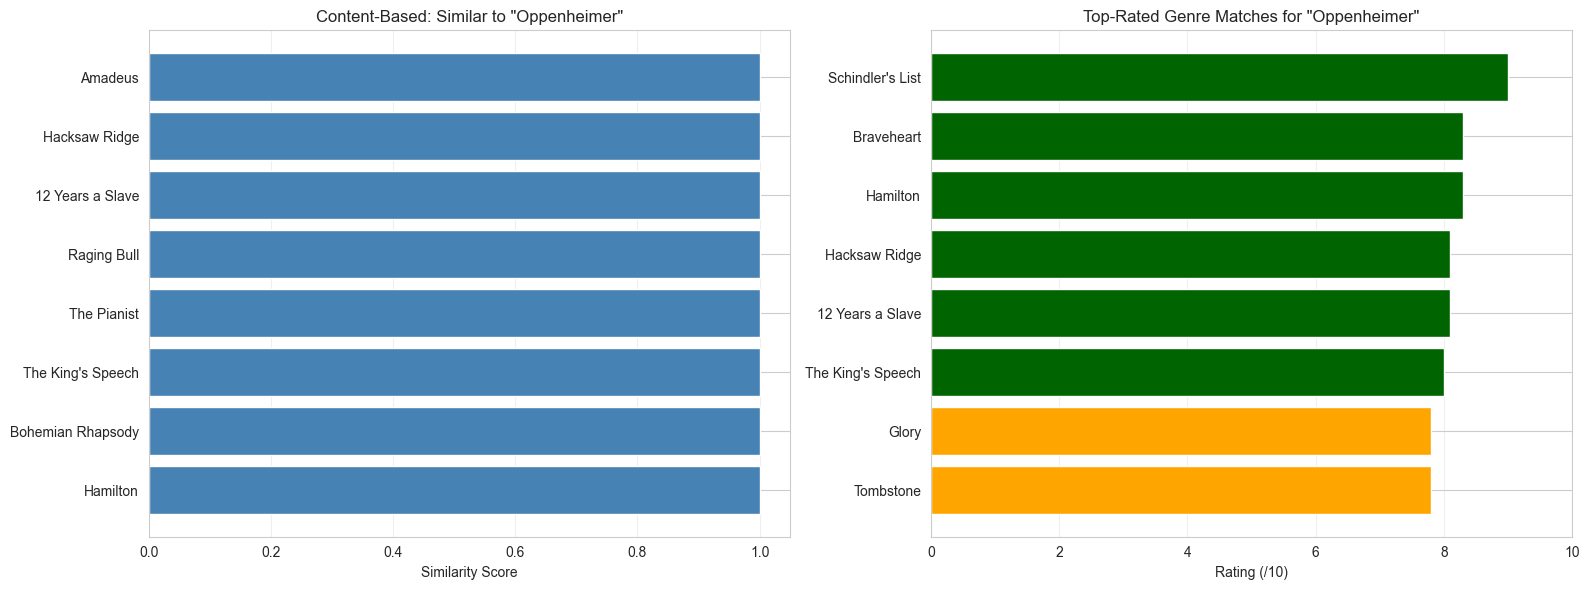


📊 Detailed Recommendations for 'Oppenheimer'

Content-Based Recommendations:
 rank             title  rating  score
    1           Amadeus     8.4 1.0000
    2     Hacksaw Ridge     8.1 1.0000
    3  12 Years a Slave     8.1 0.9999
    4       Raging Bull     8.1 0.9999
    5       The Pianist     8.5 0.9999
    6 The King's Speech     8.0 0.9999
    7 Bohemian Rhapsody     7.9 0.9999
    8          Hamilton     8.3 0.9999


Genre-Based Recommendations:
 rank             title  rating  score
    1  Schindler's List     9.0    1.0
    2        Braveheart     8.3    1.0
    3          Hamilton     8.3    1.0
    4     Hacksaw Ridge     8.1    1.0
    5  12 Years a Slave     8.1    1.0
    6 The King's Speech     8.0    1.0
    7             Glory     7.8    1.0
    8         Tombstone     7.8    1.0


In [22]:
# Detailed visualization for sample movie
sample_movie = 'Oppenheimer'

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Content-based recommendations
content_recs = recommender.get_recommendations(sample_movie, n_recommendations=8)
if content_recs is not None and len(content_recs) > 0:
    axes[0].barh(range(len(content_recs)), content_recs['score'].values, color='steelblue')
    axes[0].set_yticks(range(len(content_recs)))
    axes[0].set_yticklabels(content_recs['title'].values)
    axes[0].invert_yaxis()
    axes[0].set_xlabel('Similarity Score')
    axes[0].set_title(f'Content-Based: Similar to "{sample_movie}"')
    axes[0].grid(axis='x', alpha=0.3)

# Genre-based recommendations with ratings
genre_recs = genre_recommender.get_recommendations(sample_movie, n_recommendations=8)
if genre_recs is not None and len(genre_recs) > 0:
    colors = ['darkgreen' if r >= 8 else 'orange' if r >= 6 else 'coral' for r in genre_recs['rating']]
    axes[1].barh(range(len(genre_recs)), genre_recs['rating'].values, color=colors)
    axes[1].set_yticks(range(len(genre_recs)))
    axes[1].set_yticklabels(genre_recs['title'].values)
    axes[1].invert_yaxis()
    axes[1].set_xlabel('Rating (/10)')
    axes[1].set_title(f'Top-Rated Genre Matches for "{sample_movie}"')
    axes[1].set_xlim([0, 10])
    axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed comparison
print(f"\n📊 Detailed Recommendations for '{sample_movie}'")
print("\nContent-Based Recommendations:")
if content_recs is not None:
    print(content_recs[['rank', 'title', 'rating', 'score']].to_string(index=False))

print(f"\n\nGenre-Based Recommendations:")
if genre_recs is not None:
    print(genre_recs[['rank', 'title', 'rating', 'score']].to_string(index=False))

## Section 9: Package as Flask Endpoint (Optional)

First, let's save the recommender models for use in the Flask app.

In [26]:
import joblib

print("💾 Saving Models for Flask Deployment...")

# Save necessary data for Flask
models_data = {
    'movies_df': movies_df_reset[['title', 'Genre', 'Rating', 'Votes']],
    'cosine_sim': cosine_sim,
    'tfidf_vectorizer': tfidf,
}

# Save to pickle files
joblib.dump(models_data['movies_df'], r'D:\PROJECTS\moive\data\movies_data.pkl')
joblib.dump(models_data['cosine_sim'], r'D:\PROJECTS\moive\data\cosine_similarity.pkl')
joblib.dump(models_data['tfidf_vectorizer'], r'D:\PROJECTS\moive\data\tfidf_vectorizer.pkl')

print("✅ Models saved successfully!")
print("   - movies_data.pkl")
print("   - cosine_similarity.pkl")
print("   - tfidf_vectorizer.pkl")
print("\n🚀 Ready for Flask deployment!")

💾 Saving Models for Flask Deployment...
✅ Models saved successfully!
   - movies_data.pkl
   - cosine_similarity.pkl
   - tfidf_vectorizer.pkl

🚀 Ready for Flask deployment!
